In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

#from pandas import read_html

import pandas as pd

In [3]:
data = pd.read_csv("US_population.csv",index_col ='year')
pop = data.population /1e6
pop_df = pop

year
1900     76.094000
1901     77.584000
1902     79.163000
1903     80.632000
1904     82.166000
1905     83.822000
1906     85.450000
1907     87.008000
1908     88.710000
1909     90.490000
1910     92.407000
1911     93.863000
1912     95.335000
1913     97.225000
1914     99.111000
1915    100.546000
1916    101.961000
1917    103.268000
1918    103.208000
1919    104.514000
1920    106.461000
1921    108.538000
1922    110.049000
1923    111.947000
1924    114.109000
1925    115.829000
1926    117.397000
1927    119.035000
1928    120.509000
1929    121.767000
           ...    
1987    242.288918
1988    244.498982
1989    246.819230
1990    249.622814
1991    252.980941
1992    256.514224
1993    259.918588
1994    263.125821
1995    266.278393
1996    269.394284
1997    272.646925
1998    275.854104
1999    279.040168
2000    282.162411
2001    284.968955
2002    287.625193
2003    290.107933
2004    292.805298
2005    295.516599
2006    298.379912
2007    301.231207
2008   

In [4]:
pop [1900]

76.094

Saving figure to file figs/proj01-fig01.png


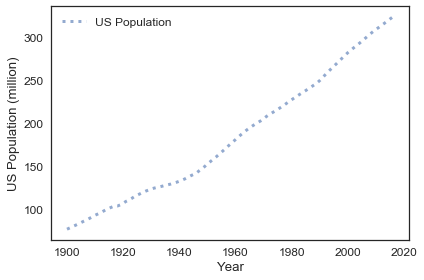

In [5]:
plot (pop,':', label ='US Population')
decorate(xlabel='Year',
        ylabel='US Population (million)')
savefig('figs/proj01-fig01.png')

In [6]:
t_0 = 1900
t_gd_start = 1928
t_gd_end = 1941
t_norm_start = t_gd_end + 1
t_norm_end = 2018
elapsed_time_bgd = t_gd_start - t_0

28

In [7]:
p_0 =  pop[t_0]

76.094

In [8]:
p_gd_start = pop[t_gd_start]

120.509

In [9]:
deltap_bgd = p_gd_start - p_0

44.415000000000006

In [10]:
growth_rate_bgd = deltap_bgd/elapsed_time_bgd

1.5862500000000002

In [11]:
pop_df = pop [(pop.index >= t_0) & (pop.index <= t_gd_start -1)]

year
1900     76.094
1901     77.584
1902     79.163
1903     80.632
1904     82.166
1905     83.822
1906     85.450
1907     87.008
1908     88.710
1909     90.490
1910     92.407
1911     93.863
1912     95.335
1913     97.225
1914     99.111
1915    100.546
1916    101.961
1917    103.268
1918    103.208
1919    104.514
1920    106.461
1921    108.538
1922    110.049
1923    111.947
1924    114.109
1925    115.829
1926    117.397
1927    119.035
Name: population, dtype: float64

In [12]:
print (pop_df)

year
1900     76.094
1901     77.584
1902     79.163
1903     80.632
1904     82.166
1905     83.822
1906     85.450
1907     87.008
1908     88.710
1909     90.490
1910     92.407
1911     93.863
1912     95.335
1913     97.225
1914     99.111
1915    100.546
1916    101.961
1917    103.268
1918    103.208
1919    104.514
1920    106.461
1921    108.538
1922    110.049
1923    111.947
1924    114.109
1925    115.829
1926    117.397
1927    119.035
Name: population, dtype: float64


In [13]:
system = System(t_0 = t_0,
                t_gd_start = t_gd_start,
                t_gd_end = t_gd_end,
                t_norm_start = t_norm_start,
                t_norm_end = t_norm_end,
                p_0 = p_0,
                p_gd_start = p_gd_start,
                growth_rate_bgd = growth_rate_bgd,
               alpha = 0.023,
               beta = 0.00135)

,values
t_0,1900.00000
t_gd_start,1928.00000
t_gd_end,1941.00000
t_norm_start,1942.00000
t_norm_end,2018.00000
p_0,76.09400
p_gd_start,120.50900
growth_rate_bgd,1.58625
alpha,0.02300
beta,0.00135


In [14]:
def run_simulation (system, update_func):
    results = TimeSeries()
    results[system.t_gd_start] = system.p_gd_start
    
    for t in linrange(system.t_gd_start, system.t_gd_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

Saving figure to file figs/proj01-fig02.png


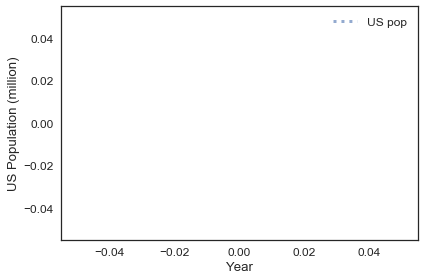

In [16]:
plot (pop_df + results, ':',label = "US pop")
decorate(xlabel='Year',
        ylabel='US Population (million)')
savefig('figs/proj01-fig02.png')

In [15]:
def update_func_quad (pop,t,system):
    return pop + growth_rate_bgd

results = run_simulation (system, update_func_quad)

,values
1928,120.50900
1929,122.09525
1930,123.68150
1931,125.26775
1932,126.85400
1933,128.44025
1934,130.02650
1935,131.61275
1936,133.19900
1937,134.78525


In [18]:
print (results)

1928    120.50900
1929    122.09525
1930    123.68150
1931    125.26775
1932    126.85400
1933    128.44025
1934    130.02650
1935    131.61275
1936    133.19900
1937    134.78525
1938    136.37150
1939    137.95775
1940    139.54400
1941    141.13025
dtype: float64


In [17]:
results_df = results.df ()

AttributeError: 'TimeSeries' object has no attribute 'df'

In [ ]:
pop_df